**Q1. Problem Statement: ROC, AUC, Precision, Recall, and F1 Score**

Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and perform the following tasks:
1.	Identify the null values and remove the null rows and columns by using the dropna() function
2.	Considering the 'diagnosis' column as the target, encode the 'diagnosis' column using the LabelEncoder()
3.	Separate the target variable and the feature vectors
4.	Split the dataset into the training set and test set in a 70:30 ratio
5.	 Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also, print their accuracies
6.	Calculate the  ROC_AUC score based on the False Positive Rate (FPR) and True Positive Rate (TPR)
7.	Plot the ROC Curve using the Matplotlib library
8.	Calculate the F1 Score
9.	Calculate and Print the Precision, Recall, and F1 score using the classification_report() function


**Step-1:** importing the required libraries.

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

**Step-2:** Loading the CSV data into a DataFrame. 

In [2]:
data=pd.read_csv("Breast_Cancer_Dataset.csv")
df = data.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Step-3:** Identifying and dropping the null rows/columns.

In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df = df.iloc[: , :-1]

**Step-4:** Encoding the 'diagnosis' column using the LabelEncoder()

In [5]:
le = preprocessing.LabelEncoder()
df.diagnosis = le.fit_transform(df['diagnosis'])

**Step-5:** Separating the target variable and the feature vectors.

In [6]:
X = df.drop(["diagnosis"], axis=1) # Features
y = df["diagnosis"] # Target variable

**Step-6:**  Splitting the dataset into training set and test set.

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Step-7:** Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models. Also,print thier respective accuracies.

**Hint:** You can declare the algorithms in a list and iterate through them to build thier respective models and calcult thier accuracies using a for loop.

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))


for name, model in models:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn import metrics

    print("%s -> ACC: %%%.2f" % (name,metrics.accuracy_score(y_test, y_pred)*100))

Logistic Regression -> ACC: %63.16
Naive Bayes -> ACC: %63.16
Decision Tree (CART) -> ACC: %97.08
K-NN -> ACC: %76.61
SVM -> ACC: %63.16
RandomForestClassifier -> ACC: %94.74


**Step-8:** Calculating the  ROC AUC score based on False Positive Rate (FPR) and True Positive Rate (TPR).

In [9]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("roc_auc score is:")
roc_auc

roc_auc score is:


0.9384920634920634

**Step-9:** Plotting the ROC Curve using the Matplotlib library.

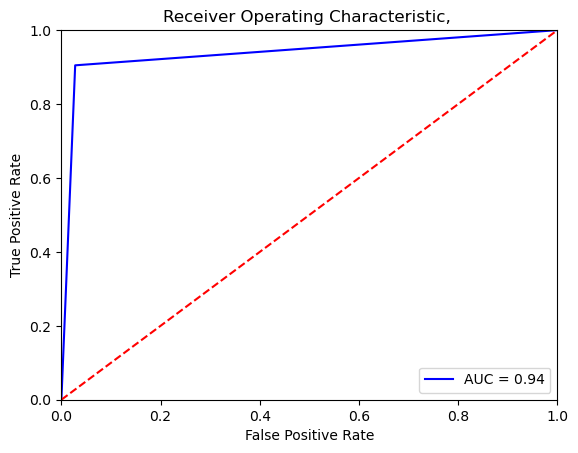

In [10]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic, ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Step-10:** Calculating the F1 Score.

In [11]:
from sklearn.metrics import f1_score
print("F1 score is:")
f1_score(y_test,y_pred)

F1 score is:


0.9268292682926829

**Step-11:** Calculating and Printing the Precision, Recall, and F1 Score using the classification_report() function.

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

